Logistic Regression on Building_01 Data from T_315500_234500_NW.bin


In [1]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


In [2]:
#Reading CSV File 
df = pd.read_csv('building_01.csv')
df1 = df.dropna() 
df2 = df1.values

In [3]:
#Checking to see if everything is working 
df.info()
#df.head(3)
classifier_count = df['Classification'].value_counts().to_frame()
classifier_count.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   X                  1048575 non-null  float64
 1   Y                  1048575 non-null  float64
 2   Z                  1048575 non-null  float64
 3   R                  1048575 non-null  int64  
 4   G                  1048575 non-null  int64  
 5   B                  1048575 non-null  int64  
 6   Point_Source_ID    1048575 non-null  int64  
 7   Scan_Angle_Rank    1048575 non-null  int64  
 8   Flightline_Edge    1048575 non-null  int64  
 9   Scan_Direction     1048575 non-null  int64  
 10  Number_of_Returns  1048575 non-null  int64  
 11  Return_Number      1048575 non-null  int64  
 12  Time               1048575 non-null  float64
 13  Intensity          1048575 non-null  int64  
 14  Classification     1048575 non-null  int64  
dtypes: float64(4), int64(11)
memory 

,Classification
2,798394
4,250181


In [4]:
#I will use all the attributes
x = df2[:, :14] 
y = df2[:, 14]

print(x.shape,y.shape)

(1048575, 14) (1048575,)


In [5]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)
print(x_train.shape, x_test.shape)

(786431, 14) (262144, 14)


In [6]:
#Logistic Regression 
logreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)
#print(yhat_train)

#finding accuracy of applying model on training data
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy on train set:",accuracy_train)

#finding accuracy of applying model on test data 
yhat_test = logreg.predict(x_test)
#print(yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test set:",accuracy_test)

Accuracy on train set: 0.8360860647660125
Accuracy on test set: 0.8361625671386719


In [7]:
#Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label=2)
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)


Coefficient: [[ 1.30546860e-01 -1.10264753e-02 -4.15273424e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.17799601e+01  1.37054477e+00
  -1.93999093e-02  0.00000000e+00  6.82812338e+02 -4.65787686e+02
  -5.23191320e+01 -3.77983224e-01]]
Intercept: [125.21105043]
Precision: 0.8337515059898616
Recall: 0.9801380581995648
Fscore: 0.9010378561464898


Confusion matrix, without normalization
[[195725   3936]
 [ 39013  23470]]
Normalized confusion matrix
[[0.98 0.02]
 [0.62 0.38]]


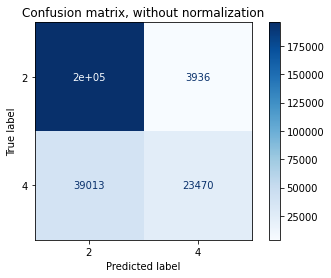

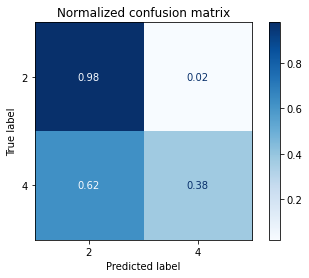

In [8]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()